<a href="https://colab.research.google.com/github/KarlYang2013/tf_study/blob/master/tf_keras_regression_customized_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.22.2.post1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [3]:
# layer.variables
# x * w + b
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-1.05016157e-01, -4.80891615e-02, -8.17205012e-03,
          1.27841786e-01, -1.89877748e-01,  1.55232087e-01,
         -7.18348175e-02,  2.57210881e-02, -2.15967804e-01,
          2.19314545e-02,  2.02184513e-01, -5.26333302e-02,
          1.45932421e-01,  2.93375701e-02,  1.09949574e-01,
          1.68704644e-01, -1.47075355e-01, -2.05540940e-01,
         -2.00106725e-01,  3.68132144e-02,  1.81100816e-02,
          9.36157554e-02, -1.78339630e-01,  2.36815348e-01,
          8.68814141e-02, -1.44363239e-01,  1.90820917e-01,
          5.53948134e-02, -1.45935893e-01,  4.74319905e-02,
         -1.05049789e-01, -6.43603653e-02, -1.71198696e-01,
          3.25793177e-02,  2.01853737e-01,  1.18799612e-01,
         -1.54137760e-01, -2.09539622e-01,  2.22852036e-01,
         -1.61469042e-01, -1.95633456e-01, -6.16704673e-02,
         -1.04165152e-01,  6.03623539e-02,  1.65850267e-01,
          2.15776190e-01,  1.5

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# tf.nn.softplus : log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [8]:
# customized dense layer.
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数"""
        # x * w + b. input_shape:[None, a] w:[a,b]output_shape: [None, b]
        self.kernel = self.add_weight(name = 'kernel',
                                      shape = (input_shape[1], self.units),
                                      initializer = 'uniform',
                                      trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units, ),
                                    initializer = 'zeros',
                                    trainable = True)
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    # keras.layers.Dense(1, activation="softplus"),
    # keras.layers.Dense(1), keras.layers.Activation('softplus'),
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer (Cust (None, 30)                270       
_________________________________________________________________
customized_dense_layer_1 (Cu (None, 1)                 31        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2211 - val_loss: 0.6743
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - val_loss: 0.5816
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5160 - val_loss: 0.5195
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4749 - val_loss: 0.4962
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4569 - val_loss: 0.4715
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4425 - val_loss: 0.4505
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4516 - val_loss: 0.5154
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4520 - val_loss: 0.4531
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4197 - val_loss: 0.4284
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4046 - val_lo

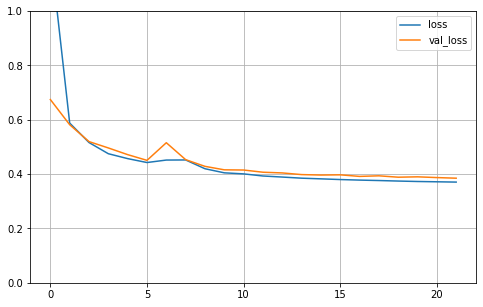

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [11]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.3862929940223694